### Ví dụ minh hoạ mạng CNN sử dụng nhiều lớp tích chập chồng lên nhau nên các đặc trưng cục bộ (local patterns) được kết hợp để tạo thành đặc trưng tổng quát hơn (global patterns)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# load ảnh bằng openCV và chuyển sang tensor
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (64, 64)) 
    img = img / 255.0  # Chuẩn hóa về [0,1]
    img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
    return img, img_tensor

image_path = "fish.jpg" 
original_img, img_tensor = load_image(image_path)
print("Original image shape:", original_img.shape)
print("Image tensor shape:", img_tensor.shape)

Original image shape: (64, 64)
Image tensor shape: torch.Size([1, 1, 64, 64])


### 1) Định nghĩa mạng CNN nhiều lớp

In [2]:
class ML_CNN(nn.Module):
    def __init__(self):
        super(ML_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)  # Lớp 1: Phát hiện cạnh
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)  # Lớp 2: Kết hợp cạnh
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)  # Lớp 3: Học đặc trưng tổng thể

    def forward(self, x):
        x1 = F.relu(self.conv1(x)) 
        x2 = F.relu(self.conv2(x1))  
        x3 = F.relu(self.conv3(x2))  
        return x1, x2, x3  

# Khởi tạo mạng CNN
model = ML_CNN()

# Dự đoán qua từng lớp
with torch.no_grad():
    feature_maps = model(img_tensor)


### 2) Hiển thị đặc trưng qua từng lớp

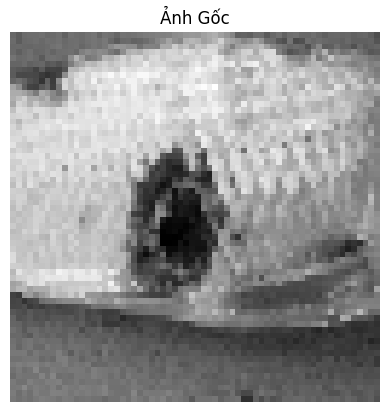

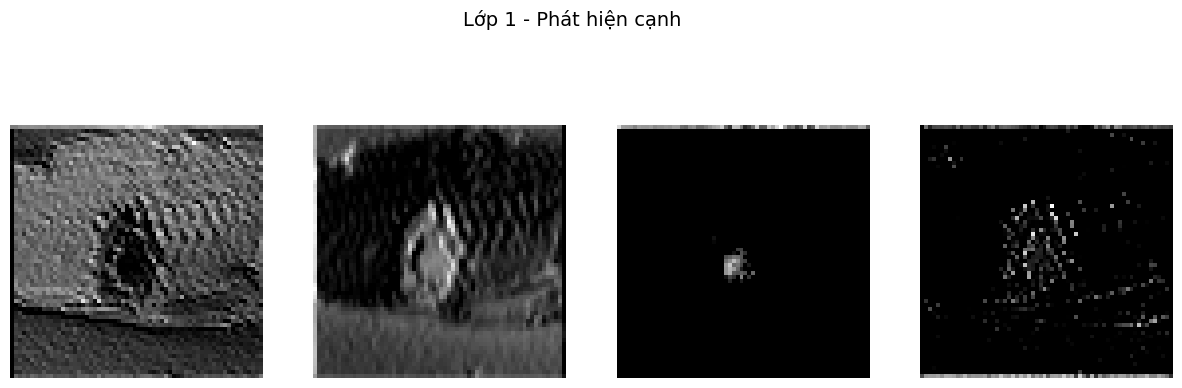

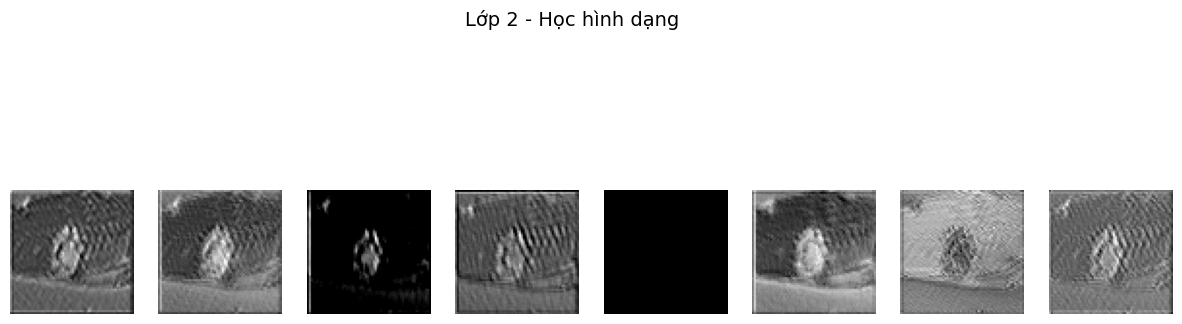

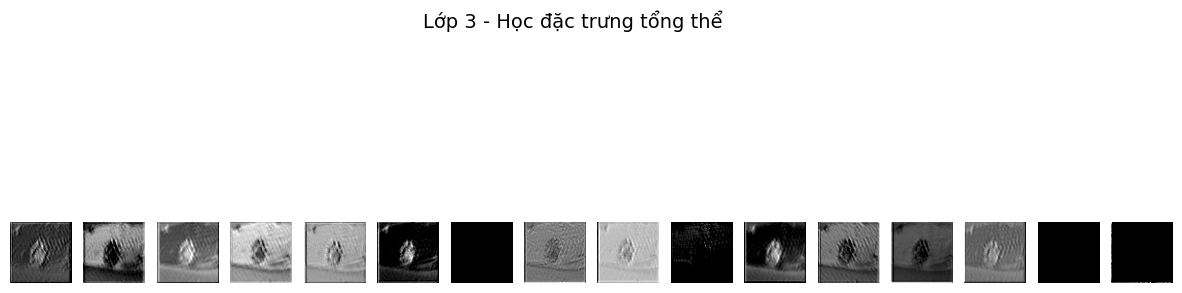

In [3]:
def plot_feature_maps(feature_maps, title):
    num_filters = feature_maps.shape[1]
    fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))
    
    for i in range(num_filters):
        axes[i].imshow(feature_maps[0, i].cpu().numpy(), cmap='gray')
        axes[i].axis("off")
    
    plt.suptitle(title, fontsize=14)
    plt.show()

# Hiển thị ảnh gốc
plt.imshow(original_img, cmap='gray')
plt.title("Ảnh Gốc")
plt.axis("off")
plt.show()

# Hiển thị đầu ra của từng lớp CNN
plot_feature_maps(feature_maps[0], "Lớp 1 - Phát hiện cạnh")
plot_feature_maps(feature_maps[1], "Lớp 2 - Học hình dạng")
plot_feature_maps(feature_maps[2], "Lớp 3 - Học đặc trưng tổng thể")
